<a href="https://colab.research.google.com/github/Renzou1/treinamento-h2ia/blob/main/03_busca_tabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da mochila usando Busca Tabu
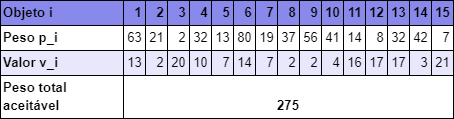

In [63]:
import numpy as np

In [64]:
def flip(list, index):
  if(list[index] == 0):
    list[index] = 1
  else:
    list[index] = 0

def get_best_move(backpack, tabu):
  i = 0
  best_move = 0
  current_best_value = 0

  while i < backpack.size:
    if(tabu[i] == 0):
      backpack.flip_equipped(i)
      current_value = backpack.calculateValue()
      if(current_value > current_best_value):
        current_best_value = current_value
        best_move = i
      backpack.flip_equipped(i) # unflips

    else:
      tabu[i] = tabu[i] - 1

    i = i + 1

  return best_move

In [65]:
class Backpack:
  def __init__(self, size, weights, values, equipped, max_weight=275):
    self.size = 15
    self.weights = weights
    self.values = values
    self.equipped = equipped
    self.max_weight = max_weight

  def calculateWeight(self):
    sum = 0
    for item in np.arange(1, self.size):
      sum = sum + self.equipped[item] * self.weights[item]
    return sum

  def calculateValue(self):
    if(self.calculateWeight() > 275):
      return 0
    sum = 0
    for item in np.arange(1, self.size):
     sum = sum + self.equipped[item] * self.values[item]
    return sum

  def flip_equipped(self, index):
    flip(self.equipped, index)


In [66]:
size = 15
max_weight = 275
id = np.arange(1, size)
weights = np.array([63, 21, 2, 32, 13, 80, 19, 37, 56, 41, 14, 8, 32, 42, 7])
values = np.array([13, 2, 20, 10, 7, 14, 7, 2, 2, 4, 16, 17, 17, 3 ,21])
equipped = np.array([x % 2 for x in range(size)])

backpack = Backpack(size, weights, values, equipped)

def tabu_search(backpack, max_iterations=10000):
  iterations = 0
  best_iteration = 0
  tabu = np.zeros(backpack.size)
  tabu_time = 3

  best_solution = backpack.equipped.copy()
  best_value = backpack.calculateValue()
  final_weight = backpack.calculateWeight()
  print("inital state:", best_solution)
  print("initial value:", best_value)
  print("initial weight:", final_weight)
  print()

  while iterations < max_iterations:
    iterations = iterations + 1
    current_move = get_best_move(backpack, tabu)
    backpack.flip_equipped(current_move)
    tabu[current_move] = tabu_time

    current_value = backpack.calculateValue()
    if(current_value > best_value):
      best_value = current_value
      best_solution = backpack.equipped.copy()
      best_iteration = iterations
      final_weight = backpack.calculateWeight()

  print("best solution:", best_solution)
  print("best value:", best_value)
  print("best iteration:", best_iteration)
  print("final weight:", final_weight)

tabu_search(backpack)

inital state: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
initial value: 52
initial weight: 261

best solution: [0 1 1 1 1 1 1 0 0 1 1 1 1 0 1]
best value: 135
best iteration: 12
final weight: 269
